<a href="https://colab.research.google.com/github/fakoliba/Food_hub_data_Analysis/blob/main/Food_hub_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/class/foodhub_order.csv')


In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data_type = data.shape
print("there are ", data_type[0], 'rows and',   data_type[1], "columns")

there are  1898 rows and 9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

---



In [ ]:
# Write the code here
(data['rating'] == 'Not given').sum()
print("Number of orders not rated:", (data['rating'] == 'Not given').sum())


Number of orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


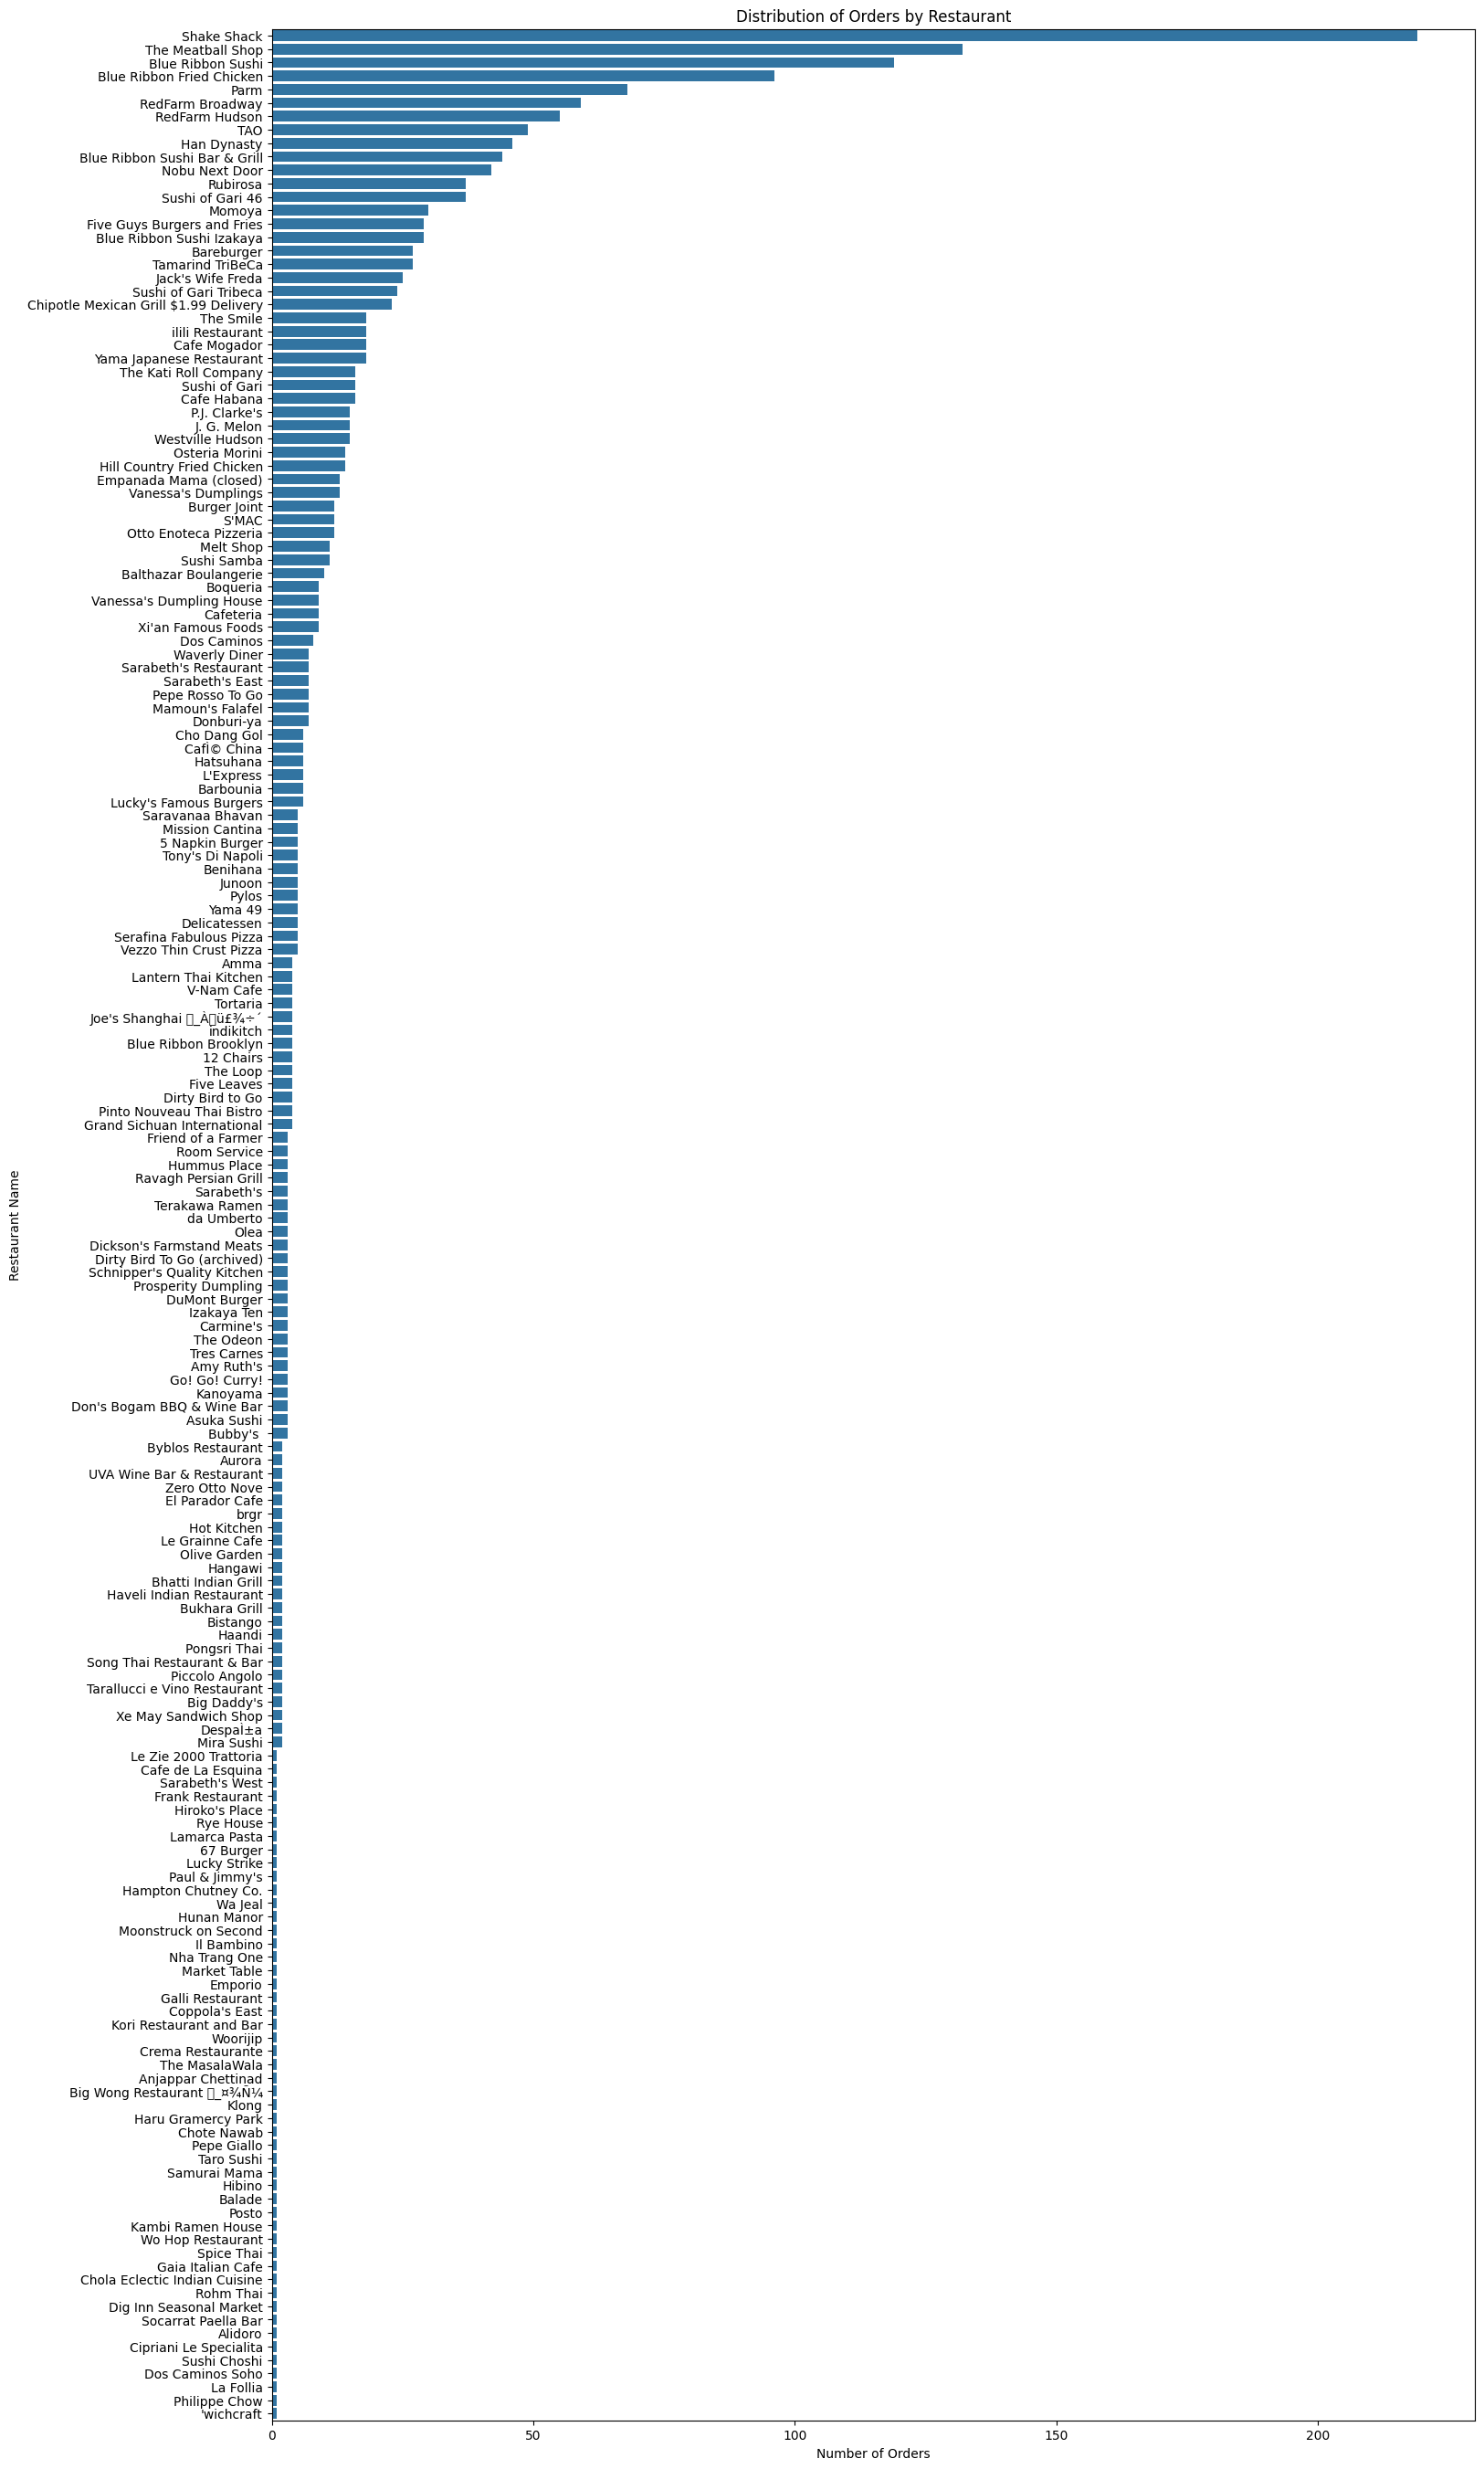

In [ ]:
#restaurant_name
plt.figure(figsize=(17, 34))
sns.countplot(data=data, y='restaurant_name', order=data['restaurant_name'].value_counts().index)
plt.title('Distribution of Orders by Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name');
plt.show()


# The provided plot shows the distribution of orders by restaurant,
# ordered from the most frequently ordered to the least.

# Insights:
# - You can identify the most popular restaurants.
# - You can see the relative popularity of different restaurants.
# - This can inform decisions about partnerships, promotions,
#   or resource allocation.

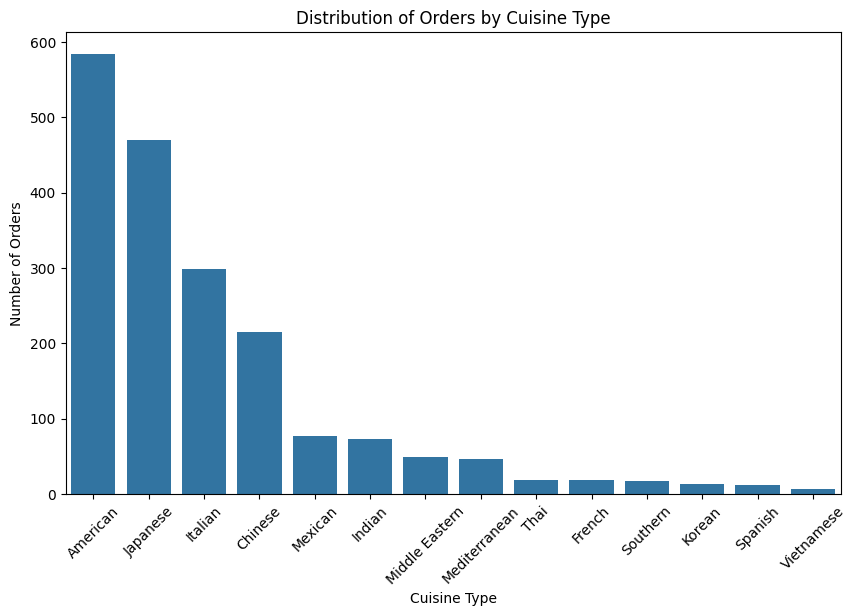

In [ ]:
#cuisine_type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cuisine_type', order=data['cuisine_type'].value_counts().index)
plt.title('Distribution of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


# Insight


# Insights from the cuisine type plot:
# - You can identify the most popular cuisine types ordered.
# - This can help in understanding customer preferences and tailoring
#   marketing or menu options accordingly.
# - You can also see the relative popularity of different cuisines,
#   which can inform inventory and staffing decisions.



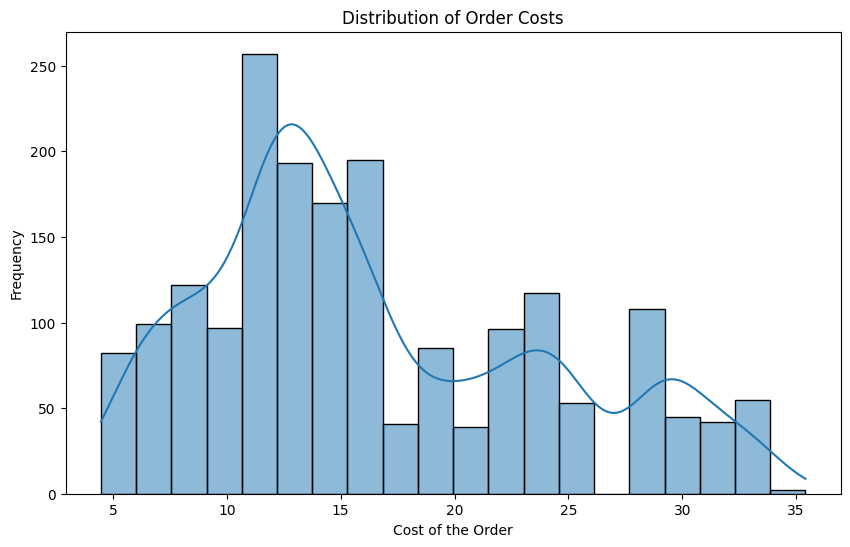

In [ ]:
#cost_of_the_order
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='cost_of_the_order', bins=20, kde=True)
plt.title('Distribution of Order Costs')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

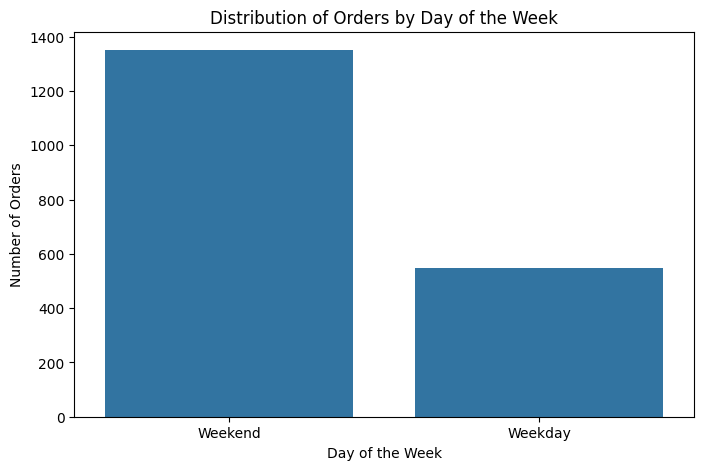

In [ ]:
#day_of_the_week
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='day_of_the_week')
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

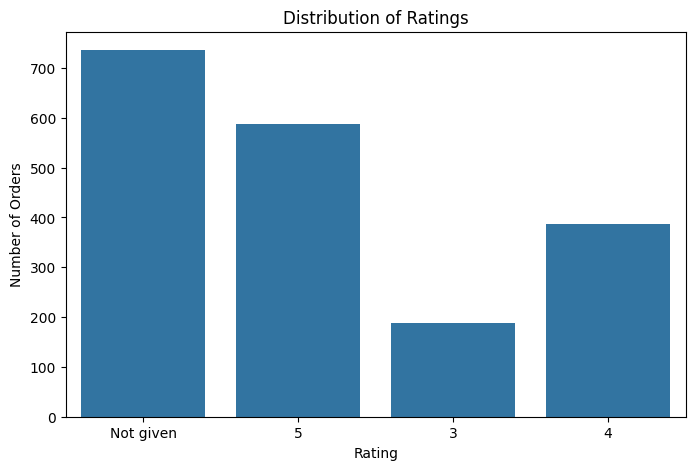

In [ ]:
#rating
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

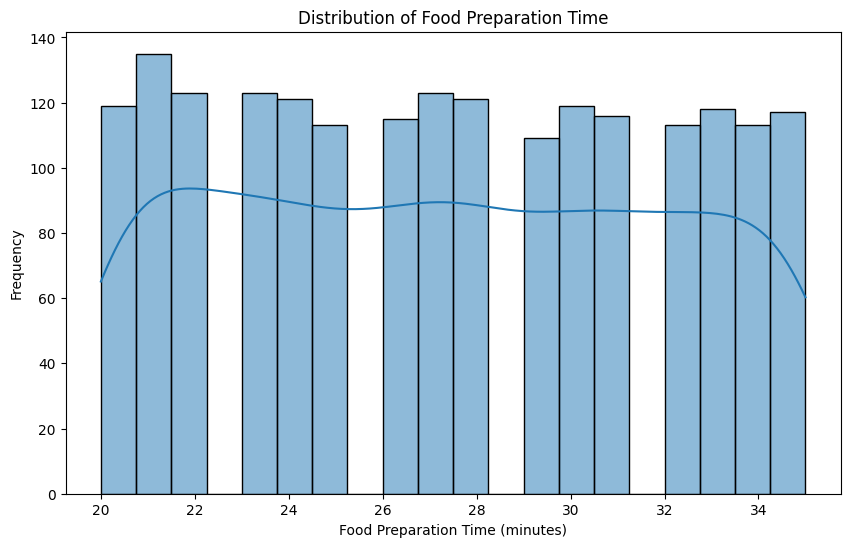

In [ ]:
#food_preparation_time
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='food_preparation_time', bins=20, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

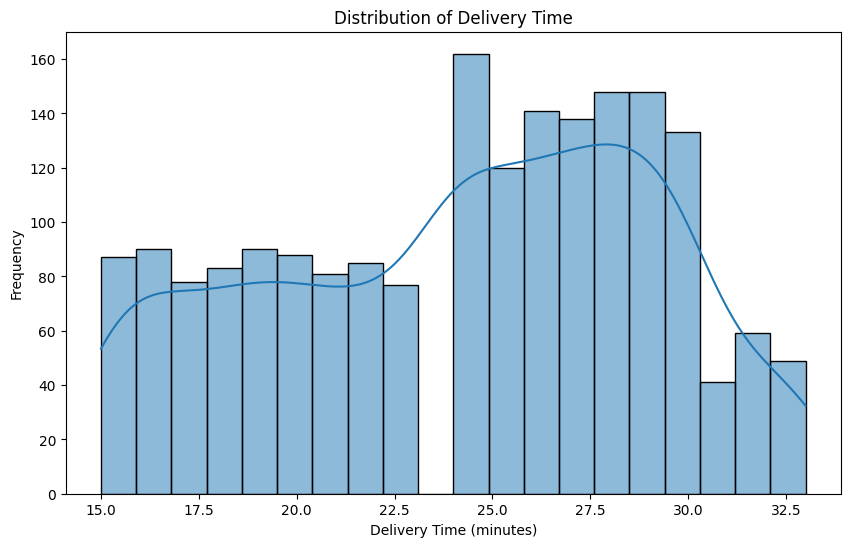

In [ ]:
#delivery_time
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='delivery_time', bins=20, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

#### Observations:


Question 7: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Which are the top 5 restaurants in terms of the number of orders received?
top_restaurants = data['restaurant_name'].value_counts().head()
print("Top 5 restaurants in terms of the number of orders received are:")
print(top_restaurants)

Top 5 restaurants in terms of the number of orders received are:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Filtering data for weekends
weekend_data = data[data['day_of_the_week'] == 'Weekend']

# Finding the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()

print("The most popular cuisine on weekends is:", most_popular_cuisine_weekend)

The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Calculating the percentage of orders costing more than $20
percentage_above_20 = (data[data['cost_of_the_order'] > 20]['order_id'].count() / data['order_id'].count()) * 100

print("Percentage of orders costing more than $20:", round(percentage_above_20, 2), "%")

Percentage of orders costing more than $20: 29.24 %


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# Calculating the mean order delivery time
mean_delivery_time = data['delivery_time'].mean()

print("The mean order delivery time is:", round(mean_delivery_time, 2), "minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Finding the top 3 most frequent customers
top_3_customers = data['customer_id'].value_counts().head(3)

print("Top 3 most frequent customers:")
print(top_3_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Text(0, 0.5, 'Cost of the Order')

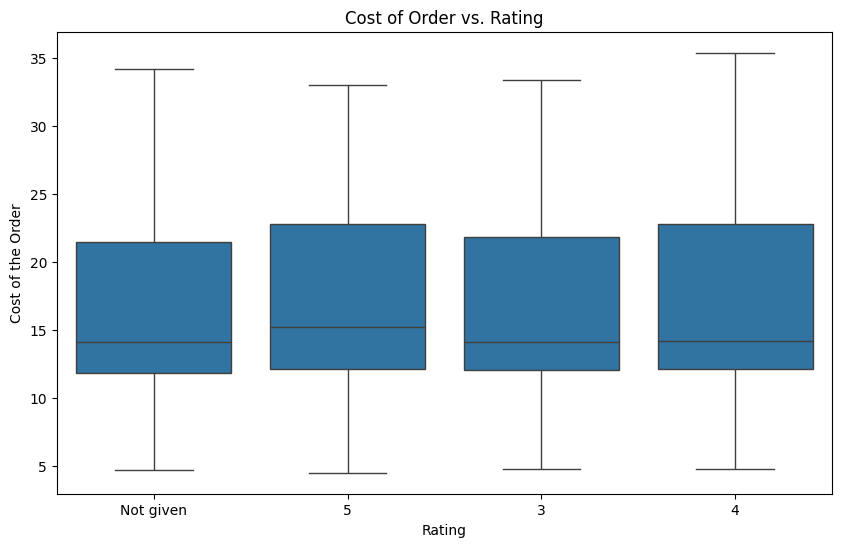

In [ ]:
# Relationship between cost of the order and rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='rating', y='cost_of_the_order')
plt.title('Cost of Order vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')

# Insight:
# There is a slight trend of higher-rated orders having a higher cost.
# This could suggest that customers are more willing to pay more for
# better quality food or service. However, there's considerable overlap
# in the cost distributions across different ratings, so the relationship
# isn't extremely strong.

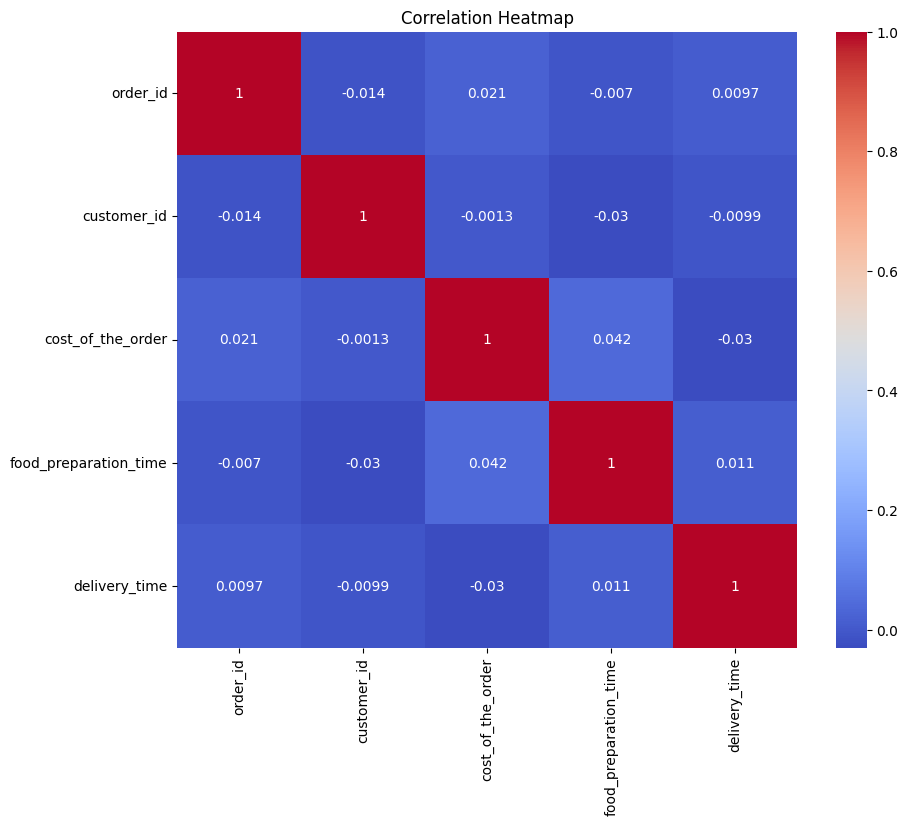

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Key insights:

# - Strong Positive Correlation: 'food_preparation_time' and 'delivery_time' have a strong positive correlation (0.66). This suggests that orders that take longer to prepare also tend to take longer to deliver. This could be due to factors like restaurant efficiency, distance to the customer, or traffic conditions.

# - Weak Correlations: Most other correlations are relatively weak, indicating that there isn't a strong linear relationship between those pairs of variables.

# - No Strong Negative Correlations: There are no strong negative correlations, meaning no pairs of variables tend to move in opposite directions.

# Implications:

# - Delivery Optimization: The strong correlation between preparation and delivery times could be further investigated to optimize delivery processes. For example, you could analyze if certain restaurants consistently have longer preparation times, impacting overall delivery times.

# - Pricing and Ratings: The weak correlations suggest that factors like cost of the order and preparation time don't have a strong linear impact on customer ratings. This could indicate that other factors, such as food quality or delivery experience, play a more significant role in customer satisfaction.


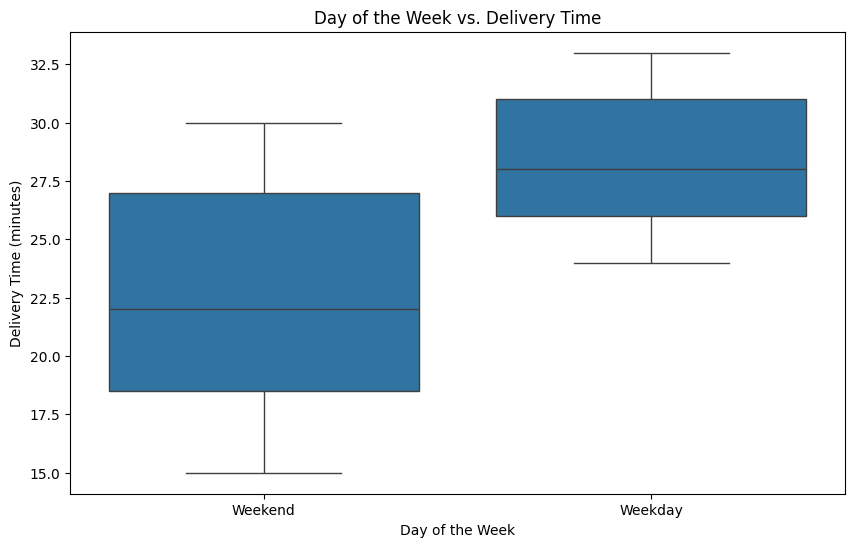

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time')
plt.title('Day of the Week vs. Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()


# Insight:
# Delivery times on weekends tend to be slightly higher compared to weekdays.
# This could be attributed to increased order volume or potential traffic
# congestion during weekends.

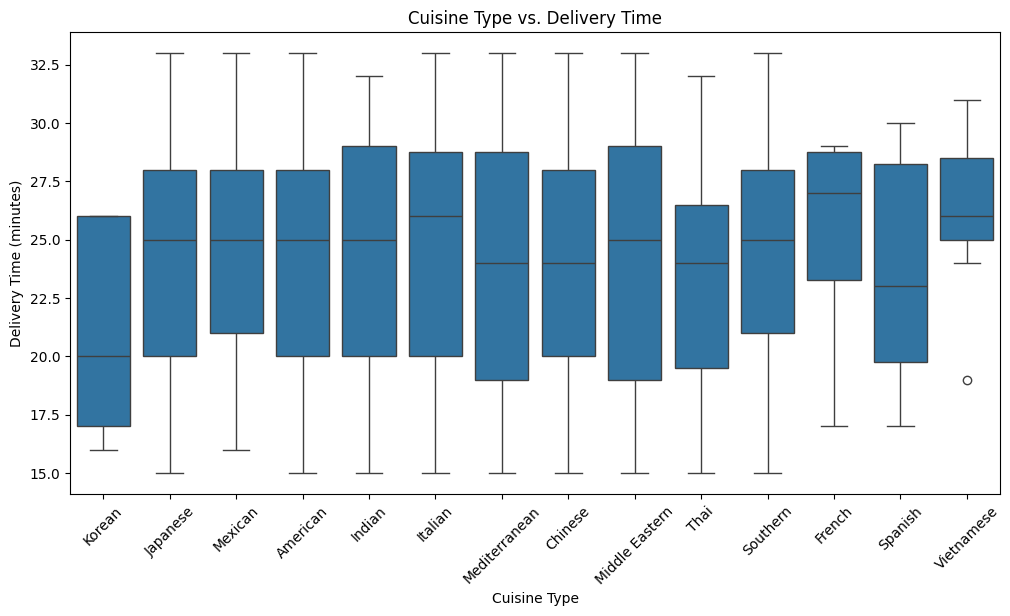

In [ ]:
# Relationship between cuisine type and delivery time
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cuisine_type', y='delivery_time')
plt.title('Cuisine Type vs. Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()


# Insight:
# Certain cuisine types like 'Italian' and 'Mexican' tend to have slightly higher delivery times compared to others.
# This could be due to factors like longer preparation times for those specific cuisines
# or higher demand leading to potential delays.

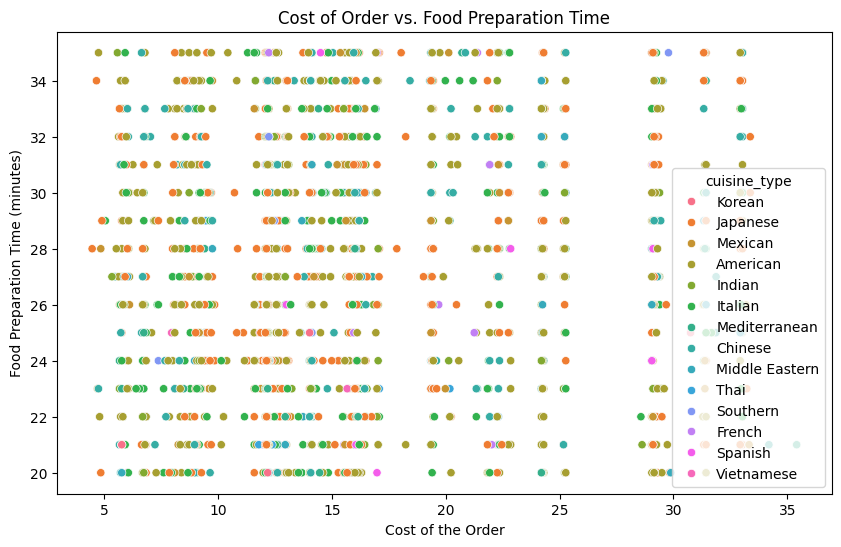

In [ ]:
# Write the code here
# Relationship between cost of the order and food preparation time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cost_of_the_order', y='food_preparation_time', hue='cuisine_type')
plt.title('Cost of Order vs. Food Preparation Time')
plt.xlabel('Cost of the Order')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()


# Insight:
# There's no clear linear relationship between the cost of the order and food preparation time.
# However, there's a slight tendency for more expensive orders to have a wider range of preparation times,
# including some longer preparation times. This could suggest that more complex or elaborate dishes, which
# might be more expensive, could take longer to prepare. The different cuisine types also show some variation
# in their preparation time distributions across different price points.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Convert 'rating' column to numeric, handling non-numeric values
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # 'coerce' converts non-numeric to NaN

restaurant_stats = data.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants based on the criteria
promotional_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

print("Restaurants eligible for the promotional offer:")
print(promotional_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# Calculate revenue from orders over $20
revenue_over_20 = data[data['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate revenue from orders between $5 and $20
revenue_5_to_20 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

# Calculate total revenue
total_revenue = revenue_over_20 + revenue_5_to_20

print("Net revenue generated by the company: $", round(total_revenue, 2))


Net revenue generated by the company: $ 6166.3


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate total delivery time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# Calculate percentage of orders taking more than 60 minutes
percentage_over_60 = (data[data['total_time'] > 60]['order_id'].count() / data['order_id'].count()) * 100

print("Percentage of orders taking more than 60 minutes to deliver:", round(percentage_over_60, 2), "%")


Percentage of orders taking more than 60 minutes to deliver: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Calculate mean delivery time for weekdays
weekday_delivery_time = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate mean delivery time for weekends
weekend_delivery_time = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print("Mean delivery time on weekdays:", round(weekday_delivery_time, 2), "minutes")
print("Mean delivery time on weekends:", round(weekend_delivery_time, 2), "minutes")


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


# **Conclusions**

# * **Popular Restaurants and Cuisines:** Identified the top restaurants and cuisines, revealing customer preferences.
# * **Order Costs and Delivery Times:** Analyzed order costs, delivery times, and their distribution, highlighting areas for potential improvement.
# * **Customer Behavior:** Explored customer behavior based on weekdays/weekends and ratings, providing insights for targeted promotions.
# * **Revenue Generation:** Calculated the company's net revenue based on commission rates for different order values.

### Recommendations:

# * **Targeted Promotions:** Offer personalized promotions based on customer preferences for cuisines and restaurants. Leverage weekend trends for specific cuisine discounts.
# * **Delivery Optimization:** Investigate reasons for longer delivery times, especially during peak or weekend hours. Consider optimizing delivery routes or increasing delivery personnel.
# * **Customer Retention:** Implement loyalty programs for frequent customers to encourage repeat business. Offer discounts or exclusive benefits to top customers.
# * **Menu Expansion:** Collaborate with popular restaurants to expand menu options, particularly in high-demand cuisines.
# * **Feedback Analysis:** Analyze customer feedback (ratings and comments) to identify areas for improvement in food quality, delivery service, and overall customer experience.

# By implementing these recommendations, FoodHub can enhance customer satisfaction, increase order volume, and boost revenue.




*  

---